T년 후의 주가: [169.5182384   82.90289919 151.6140575   99.84182795 138.67149987
 161.2454468  229.71125142 179.30078088 114.7800669  247.5186163 ]
표본평균: 157.51046852203666
표본분산: 2783.8774625902215
주가수익률: 6.666666666666667
배당금: 127.62815625000003


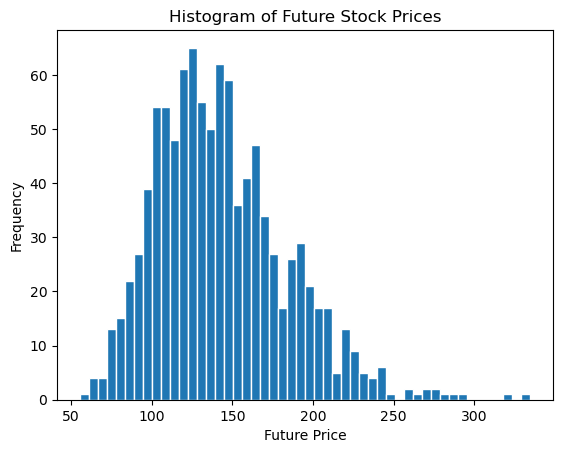

In [35]:
import random                    
import numpy as np               #random number 난수 사용하기 위해 random import
import matplotlib.pyplot as plt  #그래프 사용하기 위해 import

class Stock: # 주식클래스 생성
    def __init__(self,expected_return,volatility,stock_current_price,Dividend_yield,Net_Income):
        self.ret  = expected_return
        self.vol  = volatility
        self.S0   = stock_current_price
        self.D = Dividend_yield
        self.NI = Net_Income
        
    def stock_price_ST(self,T,seed,size):   #T년 후의 주가(ST)를 계산하는 멤버함수 생성
        np.random.seed(seed)                #주가는 정규분포를 따름
        z = np.random.normal(0,1,size)     #주가는 표준정규분포에서 난수를 생성하여 주가 계산함
        ST = self.S0 * np.exp((self.ret-1/2*self.vol**2)*T + self.vol*T**(1/2)*z)     #주어진 멤버변수 기대수익률,변동성,현재주가를 사용하여 주가 계산
        return ST                        # stock_price_ST 를 사용하면 T년 후의 주가를 리턴하도록 생성
                               
    
    def stock_sample_MV(self,T,seed,n):             # 표본평균과 표본분산을 리턴하는 멤버함수를 sample_MV라고 지칭
        np.random.seed(seed)
        stock_price = self.stock_price_ST(T,seed,n) #stock_price_ST 함수를 사용하여 T년후의 주가를 n번 생성함
        sample_mean = np.mean(stock_price)          #난수를 사용해 표본평균과 표본분산을 계산함
        sample_variance = np.var(stock_price,ddof=1)
        return sample_mean,sample_variance  
    
    def stock_future_price(self,T,seed,size):  #T년 후의 주가를 size의 개수만큼 생성하는 멤버함수 생성
        np.random.seed(seed)
        z = np.random.normal(0,1,size)
        future_price = self.S0 * np.exp((self.ret-0.5 * self.vol**2)*T + self.vol * np.sqrt(T)**0.5 * z)
        return future_price  
    
    def stock_future_price_variance(self,T):    #T년 후의 주가의 분산을 계산하는 함수 생성
        return (self.S0 **2) * np.exp(2 * self.ret*T) * (np.exp(self.vol**2*T) - 1)  #주어진 기대수익률,변동성,현재 주가를 사용하여 주가의 분산을 계산                 
                                    
                                              
    def stock_PER(self):             # PER(price  earnigng ratio) (주가수익률) = 주가(ST) / 주당 순이익(EPS)을 리턴하도록 생성
        return self.S0 / self.NI    
    
    def stock_Dividend(self,T):      #주당 배당금(DPS) =  현재주가 * (1+배당률) ** T 을 리턴하도록 생성
        return self.S0 * (1 + self.D) ** T
    
    def plot_histogram_stock_sample_MV(self,T,seed,size):    #T년 후의 주가를 size개수만큼 생성하는 함수
        future_price = self.stock_future_price(T,seed,size)  #'stock_future_price'함수를 사용하여 T년 후의 주가를 생성
        plt.hist(future_price,bins = 50,edgecolor = 'white') #'matplotlib'라이브러리를 사용하여 히스토그램을 생성
        plt.xlabel("Future Price")
        plt.ylabel("Frequency")
        plt.title("Histogram of Future Stock Prices")
        plt.show()  #객체생성
        
      
        
# 클래스 인스턴스 생성        
S = Stock(0.1,0.2,100,0.05,15) # 예시대로 기대수익률 0.1, 변동성 0.2,현재주가 100 배당률 0.05 당기순이익 15

print("T년 후의 주가:",S.stock_price_ST(4,52,10)) # T년 후 주가: T=4,seed=52,size=10 인 T년 후의 주가 출력
sample_mean , sample_variance = S.stock_sample_MV(4,52,10)
print("표본평균:",sample_mean)
print("표본분산:",sample_variance)
print("주가수익률:",S.stock_PER())
print("배당금:",S.stock_Dividend(5))

S.plot_histogram_stock_sample_MV(4,52,1000)  # 'plot_histogram_stock_sample_MV' 함수를 사용하여 주가 시뮬레이션 결과를 히스토그램으로 시각화

                                 
                                